NGC 188 açık yıldız kümesinin WEBDA veri tabanından U-B, B-V renk indekslerini kullanarak, daha önceki ödevde verdiğim Sung Anakolu ile çakıştırınız ve buradan bir kızarma değeri elde ediniz.

In [1]:
# gerekli kütüphanelerin dahil edilmesi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# verilerin dahil edilmesi
filengc = pd.read_csv("NGC188.csv") # king verisini pandas ile oku
filezams = pd.read_csv("SUNG_ZAMS.csv") # zams verisini pandas ile oku
data_ngc = pd.DataFrame(filengc) # verileri dataframe donustur
data_zams = pd.DataFrame(filezams)
data_ngc.head()

,No,Ref,V,BV,UB
0,1,240,13.029,1.035,0.682
1,2,240,14.930,0.783,0.305
2,14,240,10.761,0.618,0.113
3,16,240,13.002,0.472,-0.033
4,101,240,16.861,0.892,NaN


In [3]:
data_ngc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1519 entries, 0 to 1518
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      1519 non-null   int64  
 1   Ref     1519 non-null   int64  
 2   V       1519 non-null   float64
 3   BV      1519 non-null   float64
 4   UB      958 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 59.5 KB


In [4]:
# pandas verilerinin numpy verilerine donusturulmesi
B_V0 = np.array(data_zams["B-V"]) # pandas verisini numpy array cevirme
U_B0 = np.array(data_zams["U-B"]) # pandas verisini numpy arary cevirme

# ngc pandas verilerini numpy verisine donustur
B_V = np.array(data_ngc["BV"]) # pandas verisini numpy array cevirme
U_B = np.array(data_ngc["UB"]) # pandas verisini numpy arary cevirme

# zams pandas verilerini numpy verisine donustur
zB_V = np.array(data_zams["B-V"])
zU_B = np.array(data_zams["U-B"])

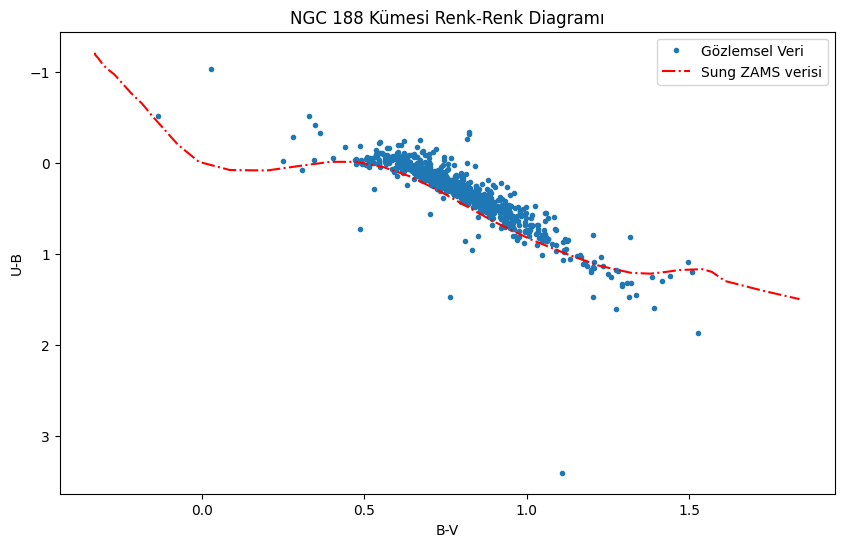

In [5]:
# verileri gorsellestirelim
plt.figure(figsize=(10,6))
plt.plot(B_V,U_B,".",label="Gözlemsel Veri")
plt.plot(B_V0,U_B0,"r-.",label="Sung ZAMS verisi")
plt.title("NGC 188 Kümesi Renk-Renk Diagramı")
plt.xlabel("B-V")
plt.ylabel("U-B")
plt.gca().invert_yaxis() # y eksenini ters çevirdik
plt.legend()
plt.savefig("ngc-1.svg",format="svg")
#plt.grid()
plt.show()

Veri direk ZAMS verisinin üzerine oturdu demek var ama oturdu mu? Nasıl anlayabilirim? Kizartmayi yapayım..

Kızartma yapmak için Gözlemsel verilerimden, zams verilerini çıkarmam gerekiyor denklem ile ifade edersem:

$$E_{B-V} = (B-V) - (B-V)_0$$

ifdesini kullanarak bir E_{B-V} kızarma değeri elde etmeliyim.

Bu denklemde ;
+ $(B-V)$ : NGC-188 Gözlemsel B-V değrleri,
+ $(B-V)_0$ : Zams verilerindeki B-V değrlerinin farkı
+ $E_{B-V}$ : İfadesi ise benim kızarma değerim.

In [6]:
# veriyi filtrele 0.5<B-V(gözlemsel)<1.11
b_v1 = np.array(B_V[B_V>0.5])
b_v = np.array(b_v1[b_v1<1.11])
b_v

array([1.035, 0.783, 0.618, ..., 1.033, 0.703, 1.087])

In [7]:
# zams verisini filtrele  0.5<B-V(Zams)<1.11
zb_v1 = np.array(zB_V[zB_V>0.5])
zb_v = np.array(zb_v1[zb_v1<1.11])
zb_v

array([0.56, 0.64, 0.72, 0.81, 0.9 , 1.01])

In [8]:
# en kucuk karaler yontemi
import numpy as np
from scipy.optimize import least_squares  # scipy kutuphanesinden en kucuk kareler yontemini dahil edelim

# Açık yıldız kümesi B-V verileri
open_cluster_bv = b_v  

# ZAMS B-V verileri
zams_bv = zb_v  

# Hedef fonksiyonu tanımlama
def residual(reddening, bv):
    return zams_bv + reddening - bv[:len(zams_bv)] # (B-V)_zams + E(B-V) - (B-V)_gozlenen = 0

# Least Squares yöntemini uygulama
initial_reddening = 0.0  # Başlangıç kızarma değeri
# fonksiyon, baslangıc degerleri, kume verileri
result = least_squares(residual, initial_reddening, args=(open_cluster_bv,))
best_reddening = result.x[0]  # En iyi kızarma değeri

# Kızarmış B-V değerlerini hesaplama
matched_bv = open_cluster_bv - best_reddening

print("Kızarma filtrelenmiş (0.5 < B-V < 1.11) değrler üzerinden değeri:{:.4f}".format(best_reddening))
print("Kızarmış B-V değerleri:", matched_bv)
print("Kızarmış B-V değer sayısı :",len(matched_bv))

Kızarma filtrelenmiş (0.5 < B-V < 1.11) değrler üzerinden değeri:0.0793
Kızarmış B-V değerleri: [0.95566667 0.70366667 0.53866667 ... 0.95366667 0.62366667 1.00766667]
Kızarmış B-V değer sayısı : 1192


In [9]:
# en kucuk karaler yontemi - tüm verler üzerinden
import numpy as np
from scipy.optimize import least_squares

# Açık yıldız kümesi B-V verileri
open_cluster_bv = B_V

# ZAMS B-V verileri
zams_bv = zB_V  

# Hedef fonksiyonu tanımlama
def residual(reddening, bv):
    return zams_bv + reddening - bv[:len(zams_bv)] # (B-V)_zams + E(B-V) - (B-V)_gozlenen = 0

# Least Squares yöntemini uygulama
initial_reddening = 0.0  # Başlangıç kızarma değeri
# fonksiyon, baslangıc degerleri, kume verileri
result = least_squares(residual, initial_reddening, args=(open_cluster_bv,))
best_reddening = result.x[0]  # En iyi kızarma değeri

# Kızarmış B-V değerlerini hesaplama
matched_bv = open_cluster_bv - best_reddening

print("Kızarma Tüm değerler üzerinden değeri:{:.4f}".format(best_reddening))
print("Kızarmış B-V değerleri:", matched_bv)
print("Kızarmış B-V değer sayısı :",len(matched_bv))

Kızarma Tüm değerler üzerinden değeri:0.3383
Kızarmış B-V değerleri: [0.69669444 0.44469444 0.27969444 ... 0.69469444 0.36469444 0.74869444]
Kızarmış B-V değer sayısı : 1519


In [10]:
# hesaplanan deger fit
EB_V = 0.079 # ngc-188 hesaplanan reddening(kizarma)

# zams B-V arrayindeki(sutunundaki) her bir veriye EB_V kizarma degerini ekleyelim
kB_V = np.array([i+EB_V for i in B_V0]) # kizartilmis B-V

# zams U-B arrayindeki(sutunundaki) her bir veriyi +0.72*kizarma+0.05*(kizarma**2)
# islemini uygulayalim
kU_B = np.array([i+(0.72*EB_V)+0.05*(EB_V**2) for i in U_B0]) # kizartilmis U-B

Eğim : 0.7240


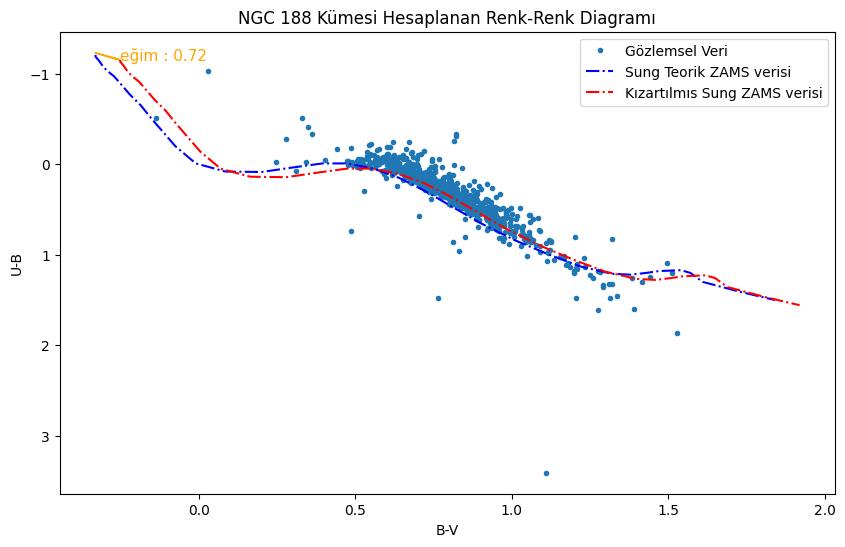

In [11]:
# hesaplanan degerlerin gorsellestirelimesi
plt.figure(figsize=(10,6))
plt.plot(B_V,U_B,".",label="Gözlemsel Veri")
plt.plot(B_V0,U_B0,"b-.",label="Sung Teorik ZAMS verisi")
plt.plot(kB_V,kU_B,"r-.",label="Kızartılmıs Sung ZAMS verisi")
plt.title("NGC 188 Kümesi Hesaplanan Renk-Renk Diagramı")
plt.xlabel("B-V")
plt.ylabel("U-B")

# iki sung verisi arasindaki egim hesabi
x = [B_V0.min(),kB_V.min()]
y = [U_B0.min(),kU_B.min()]
egim = abs((y[0]-y[1])/(x[0]-x[1]))
print("Eğim : {:.4f}".format(egim))

plt.arrow(x=kB_V[kB_V.argmin()], y=kU_B[kU_B.argmin()], dx=-0.01, dy=-0.01, head_width=0.01, head_length=0.1, color="orange")
plt.text(x=kB_V[kB_V.argmin()], y=kU_B[kU_B.argmin()],s="eğim : {:.2f}".format(egim), color="orange", fontsize=11)
plt.gca().invert_yaxis() # y eksenini ters çevirdik
plt.legend()
plt.savefig("ngc-hesaplanan.svg",format="svg")
#plt.grid()
plt.show()

In [12]:
# gercek deger fit
EB_V = 0.082 # ngc-188 webda gercek reddening(kizarma) = 0.082

# zams B-V arrayindeki(sutunundaki) her bir veriye EB_V kizarma degerini ekleyelim
kB_V = np.array([i+EB_V for i in B_V0]) # kizartilmis B-V

# zams U-B arrayindeki(sutunundaki) her bir veriyi +0.72*kizarma+0.05*(kizarma**2)
# islemini uygulayalim
kU_B = np.array([i+(0.72*EB_V)+0.05*(EB_V**2) for i in U_B0]) # kizartilmis U-B

Eğim : 0.7241


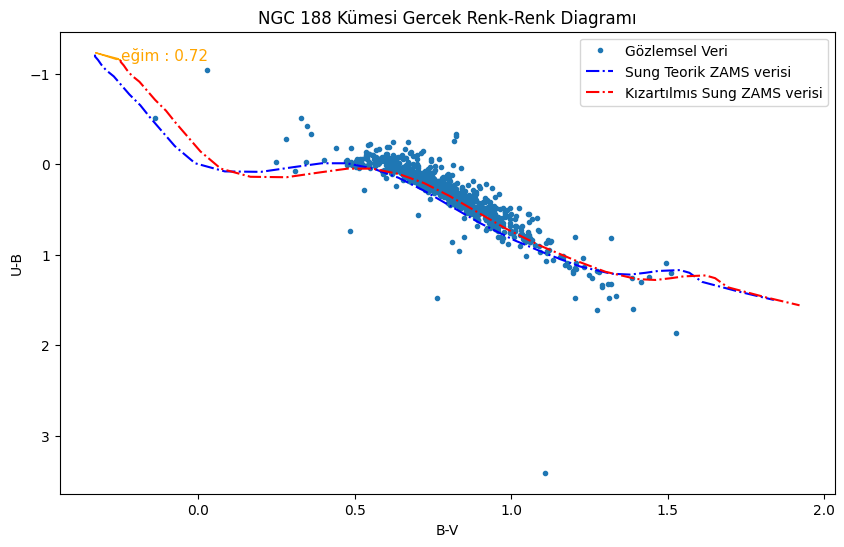

In [13]:
# verileri gorsellestirelim
plt.figure(figsize=(10,6))
plt.plot(B_V,U_B,".",label="Gözlemsel Veri")
plt.plot(B_V0,U_B0,"b-.",label="Sung Teorik ZAMS verisi")
plt.plot(kB_V,kU_B,"r-.",label="Kızartılmıs Sung ZAMS verisi")
plt.title("NGC 188 Kümesi Gercek Renk-Renk Diagramı")
plt.xlabel("B-V")
plt.ylabel("U-B")

# iki sung verisi arasindaki egim hesabi
x = [B_V0.min(),kB_V.min()]
y = [U_B0.min(),kU_B.min()]
egim = abs((y[0]-y[1])/(x[0]-x[1]))
print("Eğim : {:.4f}".format(egim))

plt.arrow(x=kB_V[kB_V.argmin()], y=kU_B[kU_B.argmin()], dx=-0.01, dy=-0.01, head_width=0.01, head_length=0.1, color="orange")
plt.text(x=kB_V[kB_V.argmin()], y=kU_B[kU_B.argmin()],s="eğim : {:.2f}".format(egim), color="orange", fontsize=11)
plt.gca().invert_yaxis() # y eksenini ters çevirdik
plt.legend()
plt.savefig("ngc-dersteki.svg",format="svg")
#plt.grid()
plt.show()

İlk olarak, open_cluster_bv ve zams_bv isimli iki array tanımlıyoruz. open_cluster_bv, açık yıldız kümesinin B-V değerlerini içeriyor, zams_bv ise sıfır yaş ana dizginin B-V değerlerini temsil ediyor.

Kod, en iyi kızarma değerini bulmak için least_squares fonksiyonunu kullanıyor. Bu fonksiyon, başlangıçta belirlenen bir kızarma değeri (initial_reddening) ve open_cluster_bv değerlerini kullanarak optimizasyon işlemini gerçekleştiriyor.

Optimizasyon sonucunda elde edilen en iyi kızarma değeri best_reddening olarak kaydediliyor. Bu değeri kullanarak, açık yıldız kümesinin B-V değerlerini kızarmış hale dönüştürüyoruz ve matched_bv olarak adlandırıyoruz.

Son olarak, kod, en iyi kızarma değerini (best_reddening), kızarmış B-V değerlerini (matched_bv) ve kızarmış B-V değerlerinin sayısını ekrana yazdırıyor.

Kodun doğru çalışabilmesi için, b_v ve zb_v olarak adlandırılan B-V değerlerini içeren değişkenlerin bu kod parçasından önce tanımlanmış olduğunu varsayıyoruz.

In [14]:
# en kucuk karaler yontemi
import numpy as np
from scipy.optimize import least_squares

# Açık yıldız kümesi B-V verileri
open_cluster_bv = b_v  

# ZAMS B-V verileri
zams_bv = zb_v  

# Hedef fonksiyonu tanımlama
def residual(reddening, bv):
    return zams_bv + reddening - bv[:len(zams_bv)]

# Least Squares yöntemini uygulama
initial_reddening = 0.0  # Başlangıç kızarma değeri
result = least_squares(residual, initial_reddening, args=(open_cluster_bv,))

best_reddening = result.x[0]  # En iyi kızarma değeri

# Kızarmış B-V değerlerini hesaplama
matched_bv = open_cluster_bv - best_reddening

print("Kızarma değeri:", best_reddening)
print("Kızarmış B-V değerleri:", matched_bv)
print("Kızarmış B-V değer sayısı :",len(matched_bv))

Kızarma değeri: 0.07933333333333334
Kızarmış B-V değerleri: [0.95566667 0.70366667 0.53866667 ... 0.95366667 0.62366667 1.00766667]
Kızarmış B-V değer sayısı : 1192


In [15]:
a = abs(0.082-0.079)/0.082
a*100

3.658536585365857

In [16]:
# webda gercek grafik egim hata
x = [B_V0.min(),kB_V.min()]
y = [U_B0.min(),kU_B.min()]
egim = abs((y[0]-y[1])/(x[0]-x[1]))
print("Eğim : {:.2f}".format(egim))
gercek = 0.72
yaklasim = egim
yhata = abs(gercek-yaklasim)/gercek
yuzhata = yhata*100
print("Bagil yüzde gerçek hata % {:.2f}".format(yuzhata))

Eğim : 0.72
Bagil yüzde gerçek hata % 0.57


<hr>

# Final Ödevi
<hr>

In [17]:
# verilerin dahil edilmesi
filengc = pd.read_csv("NGC188.csv") # king verisini pandas ile oku
filezams = pd.read_csv("SUNG_ZAMS.csv") # zams verisini pandas ile oku
data_ngc = pd.DataFrame(filengc) # verileri dataframe donustur
data_zams = pd.DataFrame(filezams)
data_ngc.head()

,No,Ref,V,BV,UB
0,1,240,13.029,1.035,0.682
1,2,240,14.930,0.783,0.305
2,14,240,10.761,0.618,0.113
3,16,240,13.002,0.472,-0.033
4,101,240,16.861,0.892,NaN


In [18]:
data_zams.head()

,Unnamed: 0,Mv,B-V,U-B,V-I,R-I,Unnamed: 6,Mv.1,U-B.1,B-V.1,V-J,V-H,V-Ks
0,1,-5.0,-0.330,-1.21,-0.360,-0.19,NaN,-4.25,-1.18,-0.330,-0.79,-0.91,-1.00
1,2,-4.5,-0.330,-1.19,-0.360,-0.19,NaN,-2.67,-1.06,-0.300,-0.71,-0.83,-0.90
2,3,-4.0,-0.325,-1.17,-0.355,-0.18,NaN,-2.14,-0.99,-0.275,-0.65,-0.76,-0.81
3,4,-3.5,-0.320,-1.15,-0.350,-0.18,NaN,-1.60,-0.89,-0.250,-0.58,-0.68,-0.73
4,5,-3.0,-0.310,-1.10,-0.330,-0.17,NaN,-1.10,-0.79,-0.225,-0.51,-0.60,-0.64


In [19]:
# pandas verilerinin numpy verilerine donusturulmesi
B_V0 = np.array(data_zams["B-V"]) # pandas verisini numpy array cevirme
U_B0 = np.array(data_zams["U-B"]) # pandas verisini numpy arary cevirme
V = np.array(data_ngc["V"])
V0 = np.array(data_zams["Mv"])

# ngc pandas verilerini numpy verisine donustur
B_V = np.array(data_ngc["BV"]) # pandas verisini numpy array cevirme
U_B = np.array(data_ngc["UB"]) # pandas verisini numpy arary cevirme

# zams pandas verilerini numpy verisine donustur
zB_V = np.array(data_zams["B-V"])
zU_B = np.array(data_zams["U-B"])

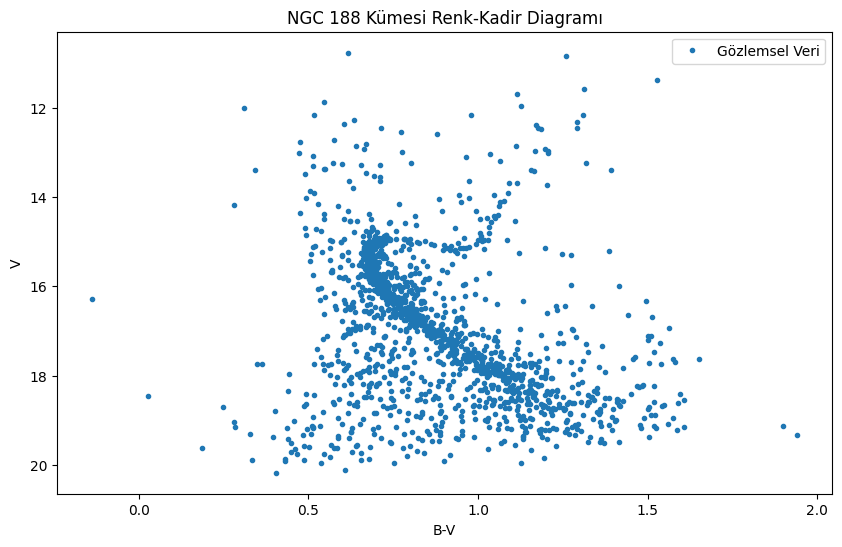

In [20]:
# verileri gorsellestirelim
plt.figure(figsize=(10,6))
plt.plot(B_V,V,".",label="Gözlemsel Veri")
plt.title("NGC 188 Kümesi Renk-Kadir Diagramı")
plt.xlabel("B-V")
plt.ylabel("V")

#plt.arrow(x=kB_V[kB_V.argmin()], y=kU_B[kU_B.argmin()], dx=-0.01, dy=-0.01, head_width=0.01, head_length=0.1, color="orange")
#plt.text(x=kB_V[kB_V.argmin()], y=kU_B[kU_B.argmin()],s="eğim : {:.2f}".format(egim), color="orange", fontsize=11)
plt.gca().invert_yaxis() # y eksenini ters çevirdik
plt.legend()
plt.savefig("ngc188-veri.svg",format="svg")
#plt.grid()
plt.show()

In [21]:
iso_data = pd.read_csv("ngc-188-iso.csv")
iso_data.head()

,logAge,Umag,Bmag,Vmag,Unnamed: 4,Unnamed: 5,Unnamed: 6,logAge.1,Umag.1,Bmag.1,Vmag.1,Unnamed: 11,Unnamed: 12,Unnamed: 13,logAge.2,Umag.2,Bmag.2,Vmag.2
0,9.6,22.607,19.983,18.146,NaN,NaN,NaN,9.65,22.606,19.983,18.146,NaN,NaN,NaN,9.7,22.606,19.983,18.145
1,9.6,22.087,19.500,17.672,NaN,NaN,NaN,9.65,22.087,19.500,17.672,NaN,NaN,NaN,9.7,22.087,19.499,17.671
2,9.6,21.030,18.588,16.793,NaN,NaN,NaN,9.65,21.028,18.587,16.792,NaN,NaN,NaN,9.7,21.506,18.957,17.140
3,9.6,20.989,18.557,16.764,NaN,NaN,NaN,9.65,19.477,17.367,15.660,NaN,NaN,NaN,9.7,21.025,18.585,16.790
4,9.6,19.479,17.369,15.662,NaN,NaN,NaN,9.65,18.472,16.550,14.891,NaN,NaN,NaN,9.7,19.475,17.366,15.659


In [22]:
iso_data["Umag.1"]

0      22.606
1      22.087
2      21.028
3      19.477
4      18.472
        ...  
333       NaN
334       NaN
335       NaN
336       NaN
337       NaN
Name: Umag.1, Length: 338, dtype: float64

In [23]:
# isochrone(es yas cizgisi) = 9.6 icin degerlerin 
# numpy arraylerine cevrilmesi
Vmag96 = np.array(iso_data.Vmag)  # V
B_V096 = np.array(iso_data.Bmag-iso_data.Vmag) # B-V

# isochrone(es yas cizgisi) = 9.65 icin degerlerin 
# numpy arraylerine cevrilmesi
Vmag965 = np.array(iso_data["Vmag.2"])
B_V0965 = np.array(iso_data["Bmag.1"]-iso_data["Vmag.1"])

# isochrone(es yas cizgisi) = 9.7 icin degerlerin 
# numpy arraylerine cevrilmesi
Vmag97 = np.array(iso_data["Vmag.2"])
B_V097 = np.array(iso_data["Bmag.2"]-iso_data["Vmag.2"])

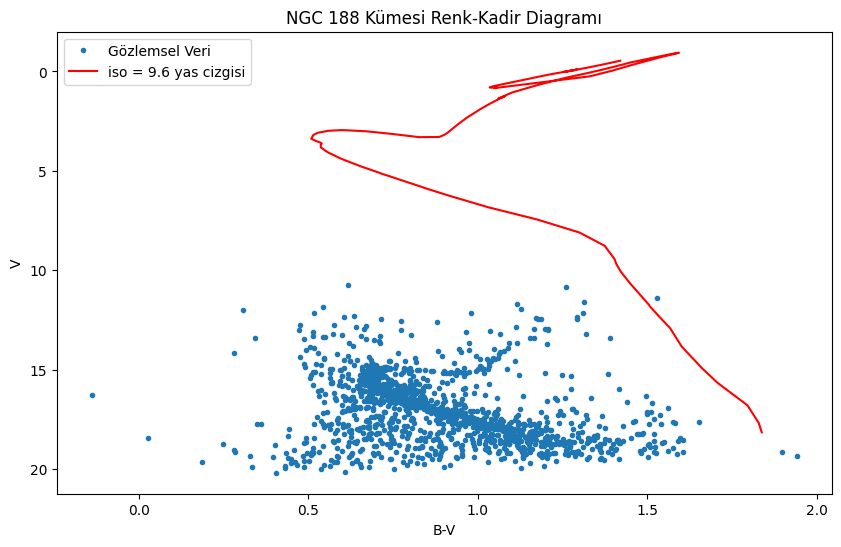

In [24]:
# verileri gorsellestirelim
plt.figure(figsize=(10, 6))
plt.plot(B_V, V, ".", label="Gözlemsel Veri")
plt.plot(B_V096[:200], Vmag96[:200], "r-", label="iso = 9.6 yas cizgisi")
# plt.plot(B_V965,V965,"b-",label="iso = 9.65 yas cizgisi")
# plt.plot(B_V97,V97,"m-",label="iso = 9.7 yas cizgisi")
plt.title("NGC 188 Kümesi Renk-Kadir Diagramı")
plt.xlabel("B-V")
plt.ylabel("V")

plt.gca().invert_yaxis()  # y eksenini ters çevirdik
plt.legend()
plt.savefig("veri-iso.svg",format="svg")
# plt.grid()
plt.show()

In [25]:
# verilerin kızartılmasi ve yas cizgisinin oturtulmasi

EB_V = 0.082 # ngc-188 reddening(kizarma) = 0.082 
EB_V1 = 0.09
DM = 11.81 # ngc-188 uzaklik modulu [mag] = 11.81
DM1 = 11.44

# V = Vmag + (3.1 * E(B-V)) + DM
V96 = Vmag96 + (3.1*EB_V1) + DM1
V965 = Vmag965 + (3.1*EB_V1) + DM1
V97 = Vmag97 + (3.1*EB_V1) + DM1

# B-V = (B-V)0 + E(B-V)
B_V96 = B_V096 + EB_V
B_V965 = B_V0965 + EB_V
B_V97 = B_V097 + EB_V

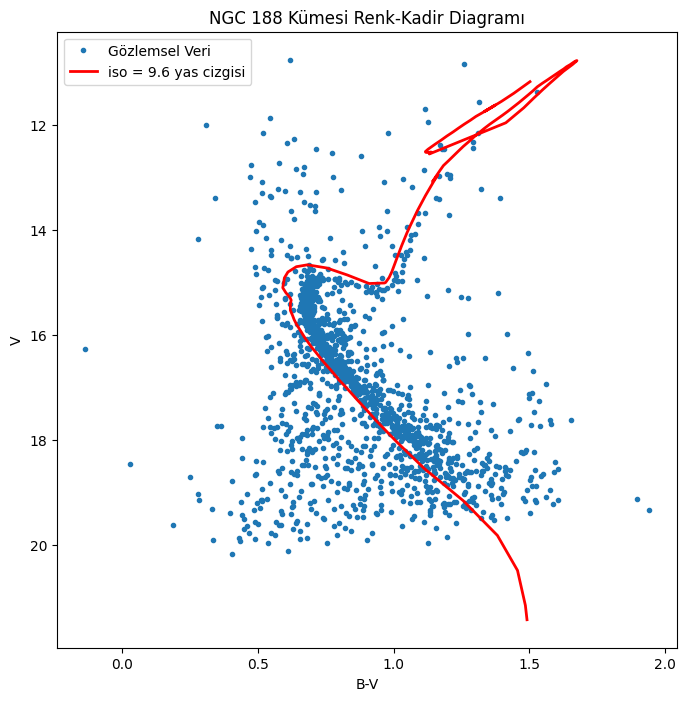

In [26]:
# verileri gorsellestirelim
plt.figure(figsize=(8,8))
plt.plot(B_V, V, ".", label="Gözlemsel Veri")
plt.plot(B_V96[15:200], V96[15:200], "r-",linewidth=2, label="iso = 9.6 yas cizgisi")
#plt.plot(B_V96[15:200], V96[15:200], "ro",linewidth=3, label="iso = 9.6 yas cizgisi")
plt.title("NGC 188 Kümesi Renk-Kadir Diagramı")
plt.xlabel("B-V")
plt.ylabel("V")
plt.gca().invert_yaxis()  # y eksenini ters çevirdik
plt.legend()
plt.savefig("iso-9.6.svg",format="svg")
# plt.grid()
plt.show()

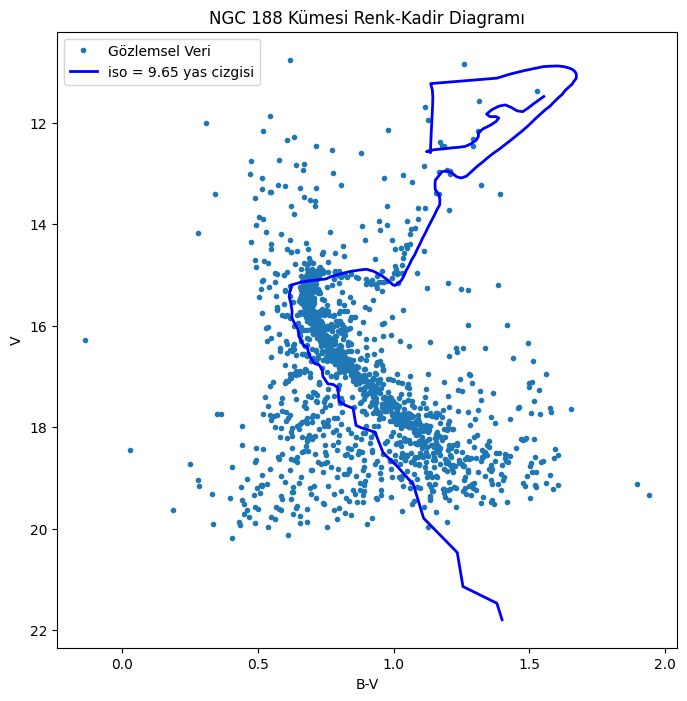

In [27]:
# verileri gorsellestirelim
plt.figure(figsize=(8,8))
plt.plot(B_V, V, ".", label="Gözlemsel Veri")
plt.plot(B_V965[15:200],V965[15:200],"b-",linewidth=2, label="iso = 9.65 yas cizgisi")
plt.title("NGC 188 Kümesi Renk-Kadir Diagramı")
plt.xlabel("B-V")
plt.ylabel("V")
plt.gca().invert_yaxis()  # y eksenini ters çevirdik
plt.legend()
plt.savefig("iso-9.65.svg",format="svg")
# plt.grid()
plt.show()

Bu çakıştırmanın neden böyle olduğunu anlayamadım.Bu işlem için PADOVA'da eşyaş 9.6'dan 9.7'ye 0.05 adım ile hesaplanmış değerler kullandım.Webda üzerinden çizdirdiğimde bu çizgi daha keskin ve net bir şekilde belliydi. Webda gerçek değer 9.63 için tekrar PADOVA datası üretip bu kısmı tekrar yapmalıyım. Bu data üretimi için 9.6'dan başlayıp tekrar 9.7'ye 0.03 adim ile hesaplanmış değrler kullanalım.

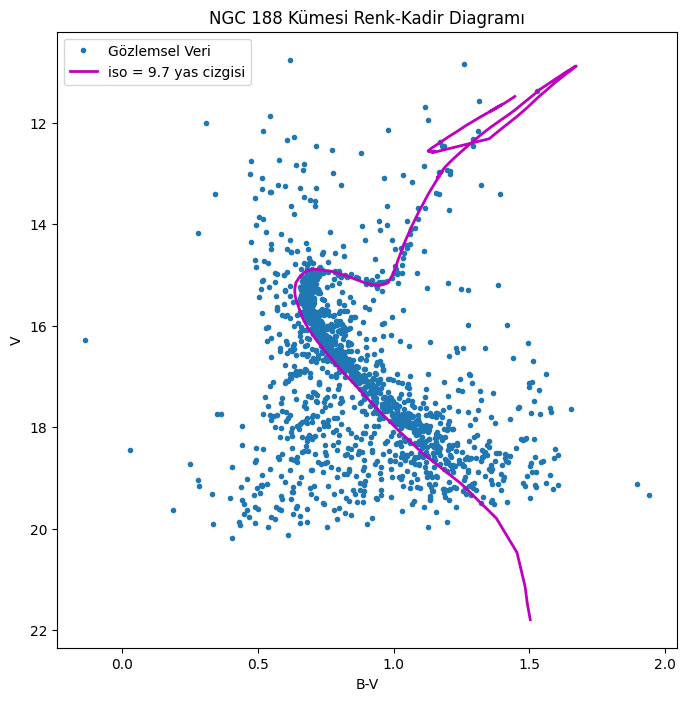

In [28]:
# verileri gorsellestirelim
plt.figure(figsize=(8,8))
plt.plot(B_V, V, ".", label="Gözlemsel Veri")
plt.plot(B_V97[15:200],V97[15:200],"m-",linewidth=2, label="iso = 9.7 yas cizgisi")

plt.title("NGC 188 Kümesi Renk-Kadir Diagramı")
plt.xlabel("B-V")
plt.ylabel("V")

plt.gca().invert_yaxis()  # y eksenini ters çevirdik
plt.legend()
plt.savefig("iso-9.7.svg",format="svg")
# plt.grid()
plt.show()

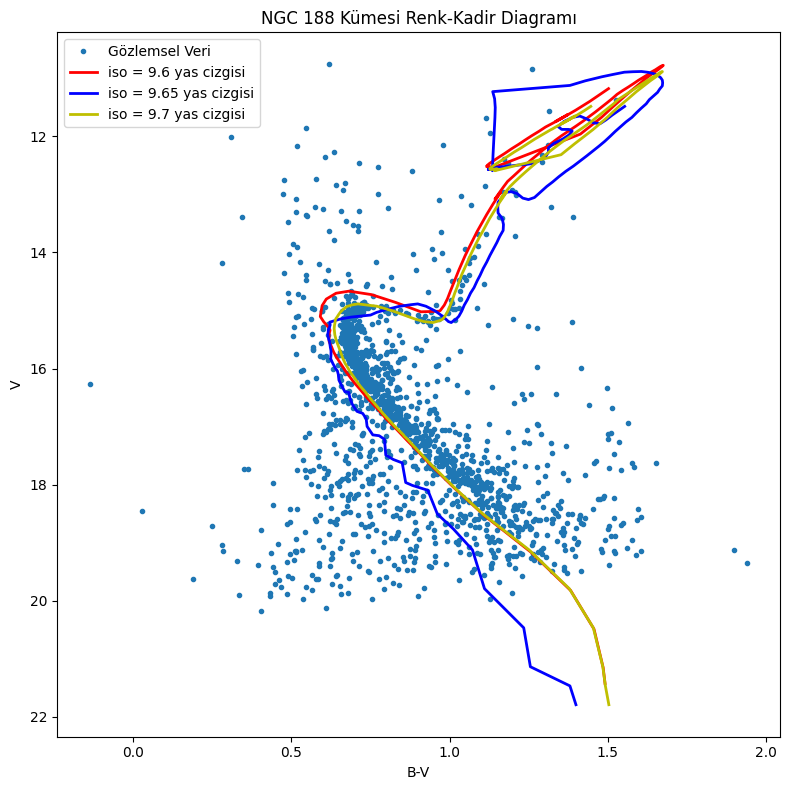

In [29]:
# verileri gorsellestirelim
plt.figure(figsize=(8, 8))
plt.plot(B_V, V, ".", label="Gözlemsel Veri")
plt.plot(B_V96[15:200], V96[15:200], "r-",linewidth=2, label="iso = 9.6 yas cizgisi")
plt.plot(B_V965[15:200],V965[15:200],"b-",linewidth=2, label="iso = 9.65 yas cizgisi")
plt.plot(B_V97[15:200],V97[15:200],"y-",linewidth=2, label="iso = 9.7 yas cizgisi")
plt.title("NGC 188 Kümesi Renk-Kadir Diagramı")
plt.xlabel("B-V")
plt.ylabel("V")

plt.gca().invert_yaxis()  # y eksenini ters çevirdik
plt.legend()
plt.tight_layout()
plt.savefig("isos1.svg",format="svg")
# plt.grid()
plt.show()

Neden böyle olduğunu anlayamadım. Aceba video dışında başka bir parametre ile oynamamız mı gerekiyor? Aslında bu sorumu kendim denedim ama bunu bu dökümana koymayacağım.